In [1]:
from __future__ import division
import numpy as np
import sys

In [2]:
#Universal Constants
c = 3e8
G = 6.67e-11
Msolar = 2e30
AU = 1.49e11 #meters
Kozai = 0 #Turn on/off Kozai osc

First define some useful functions. Here we have calculation of the semi-major axis, calculation of the angular momentum and expressions for $\dot{e}, \dot{\gamma}$ which can be set $=0$ if Kozai parameter is turned off ($=0$)

In [3]:
def sma(M,f):
    #Total mass, orbital frequency
    return (G*M/(2*np.pi*f)**2)**(1/3)

def ang_mom(m1,m2,a):
    M = m1+m2
    return m1*m2 * np.sqrt(G*a/M)

def derivs(y):
    e = y[0]
    gamma = y[1]
    
    de = 5*K*e*(1-e**2)*(1-np.cos(I)**2)*np.sin(2*gamma)/J1 
    

    
    dg_part1 = 2*(1-e**2) - 5*(1-e**2 - np.cos(I)**2)*np.sin(gamma)**2
    dg_part2 = (1 - e**2 + 5*e**2 * np.cos(gamma)**2)*np.cos(I)
    dg = 2*K*(dg_part1/J1 + dg_part2/J2)
    
    
        

    
    if Kozai == 1:
        return np.array((de,dg))
    else:
        return np.array((0.0,0.0)) #turn off derivative changes due to Kozai
    
    
def derivs2(y):
    e = y[0]
    gamma = y[1]
    
    de = 5*K*e*(1-e**2)*(1-np.cos(I)**2)*np.sin(2*gamma)/J1 
    

    #e = e1
    dg_part1 = 2*(1-e**2) - 5*(1-e**2 - np.cos(I)**2)*np.sin(gamma)**2
    dg_part2 = (1 - e**2 + 5*e**2 * np.cos(gamma)**2)*np.cos(I)
    dg = 2*K*(dg_part1/J1 + dg_part2/J2)
        

    
    if Kozai == 1:
        return np.array((de,dg))
    else:
        return np.array((0.0,0.0)) #turn off derivative changes due to Ko
    
    

Parameters relating to the inner binary: $m0, m1,f1,e1$

Parameters relating to the outer binary: $m2,e2,a2,e2$. The semi-major axis is calculated in relation to the SMA of the inner binary e.g. $a_2 = 100 a_1$

Shared parameters included the inclination $I$ which is the inclination of the inner orbit w.r.t the outer orbit and $\gamma$ which specifies the argument of periastron. 

The timescale of KL oscillation is given by

$$t_{\rm KL} = \sqrt{\frac{M a_2^6 \epsilon_1 \epsilon_2^3}{G m_2^2 a_1^3}} \sim \dot{e}^{-1}$$

If we express the $a_2$ in terms of $a_1$ times some scale factor $\beta$ ($a_2 = \beta a_1$) then:

$$t_{\rm KL} = \sqrt{\frac{M  \epsilon_1 \epsilon_2^3}{G m_2^2 } \beta^6 a_1^3} $$


In [4]:
#Inner binary parameters
m0 = 30*Msolar
m1 = 30*Msolar
f1 = 1e-3 #orbital frequency
e1 = 0.5 #eccentricity
#Inner binary calculations
eps1 = 1-e1**2
a1 = sma(m0+m1,f1)#semi major axis via K3
J1 = ang_mom(m0,m1,a1)
beta = 10

print ('Semi major axis of inner binary = ', a1/AU, ' AU')

#Outer binary parameters
m2 = 10*Msolar
e2 = 0.6
eps2 = 1-e2**2

a2 = beta*a1


J2 = ang_mom(m0+m1,m2,a2)
print ('Semi major axis of outer binary = ', a2/AU, ' AU')

#Shared
I = 45 * np.pi/180.0 #Inclination
gamma = np.pi/4

gamma0 = np.pi/4


#Other
K = 3*G*m0*m1*m2*a1**2 / (8*(m0+m1) * a2**3*(1-e2**2)**(3/2))
tKL = np.sqrt(G*m2**2*a1**3 / ((m0+m1)*a2**6 * eps1*eps2**3))


eps = tKL / f1

print ('tKL = ', tKL**(-1), 'seconds')
print ('t inner orbit', f1**(-1), 'seconds')
print ('Ratio = ', eps)


print (K/J1)
print (K/J2)

etest = 0.1
print (etest*(1-etest**2))
print (etest**2)



Semi major axis of inner binary =  0.003942722210092745  AU
Semi major axis of outer binary =  0.03942722210092746  AU
tKL =  423420.59168393567 seconds
t inner orbit 1000.0 seconds
Ratio =  0.002361717922179975
7.669903939428217e-07
3.929656402348026e-07
0.099
0.010000000000000002


In [5]:
#Now do a basic numerical integration using RK4

h = 10000 #Stepsize . seconds

Tfinal = 5  #years
Tf = 5*365*24*3600 #seconds


print (Tf / tKL**(-1))


#Tf = 10*f1**(-1) #n  timescales
#Tf = 10* tKL**(-1)


nsteps = int(Tf / h) 


out = np.zeros((nsteps,3)) #t,e,gamma
yn = np.array((e1,gamma))

print (nsteps, Tf)

t = 0
counter = 0





while t < Tf:

    k1 = h * derivs2(yn)
    k2 = h * derivs2(yn + k1/2)
    k3 = h * derivs2(yn + k2/2)
    k4 = h * derivs2(yn + k3)
    ynew = yn + (k1 + 2*k2 + 2*k3 + k4)/6
    yn = ynew
    
    t = t + h
    

    out[counter,0] = t
    out[counter,1] = yn[0]
    out[counter,2] = yn[1] 
    counter = counter + 1

372.3956819693384
15768 157680000


7.190534943213955e-10 1.5838751076062936e-09
15768 15768 15768


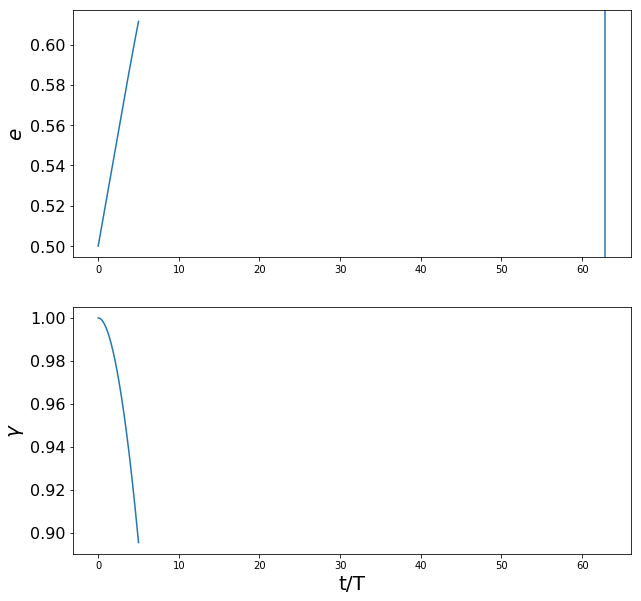

In [219]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt


        
AA = 2*K*e1/J1 + 2*K*np.cos(I)*e1/J2    
BB = -10*K*(e1 - np.cos(I)**2)/J1 + 2*K*np.cos(I)*5*0.1/J2
extra = np.arctan(np.tan(gamma0) * np.sqrt(AA+BB)/np.sqrt(AA))
newg = np.arctan(np.sqrt(AA)/np.sqrt(AA+BB) * np.tan(np.sqrt(AA)*np.sqrt(BB)*t + extra))   







t = out[:,0]
ee = out[:,1]
gg = out[:,2]


test_array=np.array([e1,gamma])
edot, gdot = derivs(test_array)
print (edot,gdot)
enew = edot*t + e1


plot_t = t / (60*60*24*365)

print (len(t), len(ee), len(gg))
fig = plt.figure(figsize=(10,10))
ax1 = plt.subplot2grid((2,1), (0,0)) 
ax2 = plt.subplot2grid((2,1), (1,0), sharex=ax1) 
ax1.plot(plot_t, ee)
ax2.plot(plot_t, np.sin(2*gg))
#ax2.plot(plot_t,np.sin(2*newg))

#ax1.plot(t,enew)



#plt.rc('text', usetex=True)
#plt.rc('font', family='serif')
#plt.setp(ax1.get_xticklabels(),visible = False)
ax1.tick_params(axis='y', which='major', labelsize=16)
ax2.tick_params(axis='y', which='major', labelsize=16)

ax2.set_xlabel('t/T', fontsize = 20)
ax1.set_ylabel('$e$', fontsize = 20)
ax2.set_ylabel('$\gamma$', fontsize = 20)


#ax1.axvline(tKL**-1/(60*60*24*3600))

period = np.pi/gdot
period = period/(365*24*3600)
ax1.axvline(period)


#ax2.set_xlim(1,1.1)


#plt.savefig('Figs/e_KZ='+str(Kozai)+'.png', dpi = 300)

In [88]:
sys.exit()
from scipy import special as sp

#Calculate the ABC for the quadrupole derivative


e_var = ee
g_var = gg
MA = 2*np.pi*f1*t 
mu = m0*m1/(m0+m1) #reduced mass of inner binary
AA = (2*np.pi*f1*(m0+m1))**(2/3) * mu
iota = 20 * np.pi/180  #angle of L vector w.r.t observer LOS 



nsum = 100

hGW = np.zeros((nsteps, 2))
for n in np.arange(1,nsum+1):

    J_2 = sp.jv(n-2,n*e_var)
    J_1 = sp.jv(n-1,n*e_var) 
    Jn = sp.jv(n,n*e_var) 
    J1 = sp.jv(n+1,n*e_var)
    J2 = sp.jv(n+2,n*e_var)
    
    an = -n*AA*(J_2 - 2*e_var*J_1 + 2*Jn/n + 2*e_var*J1 - J2)*np.cos(n*MA)
    bn = -n*AA*np.sqrt((1-e_var**2)) * (J_2 - 2*Jn + J2)*np.sin(n*MA)
    cn = 2*AA*Jn*np.cos(n*MA)
    
    
    hplus = -(1+np.cos(iota)) * (an*np.cos(2*g_var) - bn*np.sin(2*g_var)) + (1-np.cos(iota)**2)*cn
    hcross = 2*np.cos(iota)*(bn*np.cos(2*g_var) + an*np.sin(2*gamma))
    
    hGW[:,0] = hGW[:,0] + hplus
    hGW[:,1] = hGW[:,1] + hcross
    

SystemExit: 

In [ ]:
hplus = hGW[:,0] / mu
hcross = hGW[:,1] / mu


tplot = t*f1

fig = plt.figure(figsize=(10,10))
ax1 = plt.subplot2grid((2,1), (0,0)) 
ax2 = plt.subplot2grid((2,1), (1,0), sharex=ax1) 
ax1.plot(tplot, hplus)
ax2.plot(tplot, hcross)


#Prettify
ax1.set_ylim(-4e21,4e21)
ax2.set_ylim(-4e21,4e21)


plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.setp(ax1.get_xticklabels(),visible = False)
ax1.tick_params(axis='y', which='major', labelsize=16)
ax2.tick_params(axis='y', which='major', labelsize=16)

ax2.set_xlabel('t/T', fontsize = 20)
ax1.set_ylabel('$h_{+}$', fontsize = 20)
ax2.set_ylabel(r'$h_{\times}$', fontsize = 20)



plt.savefig('Figs/GW_KZ='+str(Kozai)+'.png', dpi = 300)


ax1.set_xlim(0,2)
plt.savefig('Figs/GW_ZOOM_KZ='+str(Kozai)+'.png', dpi = 300)


